In [31]:
from textblob import *
import numpy as np 
import pandas as pd
import plotly.express as px

In [32]:
data = pd.read_csv('df_after_preprocessing.csv',delimiter=';')

In [33]:
data['polarity'] = data['snippet'].map(lambda text: TextBlob(text).sentiment.polarity)

In [34]:
data['polarity']

0      0.000000
1      0.333333
2      0.000000
3     -0.300000
4     -0.316667
         ...   
565    0.000000
566   -0.270000
567   -0.350000
568   -0.175000
569    0.600000
Name: polarity, Length: 570, dtype: float64

In [35]:
px.histogram(data, x = 'polarity')


### nombre de caractère 

In [36]:
data['review_len'] = data['snippet'].astype(str).apply(len)

In [37]:
px.histogram(data, x = 'review_len')

### Nombre de mot

In [38]:
data['token_count'] = data['snippet'].apply(lambda x: len(str(x).split()))

In [39]:
px.histogram(data, x = 'token_count')

### Reviews with Positive Polarity

In [40]:
sam = data.loc[data.polarity > 0.3,['snippet']].sample(10).values
for i in sam:
    print(i[0])

excellent experience
excellent product community inspired market place
buyer scam easily platform nothing
straightforward selling process
sell quickly easily
quick reliable platform reselling clothing
many buyer fast item sell
good
adorable
super use reselling


### Reviews with Neutral Polarity

In [41]:
sam = data.loc[(data.polarity > 0) & (data.polarity <= 0.3),['snippet']].sample(10).values
for i in sam:
    print(i[0])

amazing platform wide reach buyers!
application much
buyer scammed app’s support absolutely nothing
way resell make extra cash quickly
fantastic turning old cash
fast way make unused
i’ve sold many item it’s way make extra income
navigate fast sell
super simple sold time
find buyer make old


### Reviews with negative polarity

In [42]:
sam = data.loc[data.polarity < 0,['snippet']].sample(10).values
for i in sam:
    print(i[0])

delivery soo bad ive waiting delivery guy two week suddenly cancelled order without contacting anything
slow keep crashing everytime click anything impossible use recommend
dont know dabchy account!! thats really weird!! well think understand rule !!! admin page told text gmail dont answer
bad applicationmediocre quality servicei reclamation pending two month !!!! everytime answer useful information frownsadandryorpouting dont recommend all!!!!
terrible experience delivery nothing
couldnt sign without linking annoying
horrible !!!!!!
frustrating keep getting reason
slow upload option bad keep reducing image quality
can’t believe bad customer service


### _____________________________________________________________________________

In [43]:
negative = (len(data.loc[data.polarity <0,['snippet']].values)/len(data))*100
positive = (len(data.loc[data.polarity >0.3,['snippet']].values)/len(data))*100
neutral  = len(data.loc[data.polarity >0 ,['snippet']].values) - len(data.loc[data.polarity >0.3 ,['snippet']].values)
neutral = neutral/len(data)*100

([<matplotlib.patches.Wedge at 0x21be25b82d0>,
 [Text(0.15933059705637154, 1.0883996328746444, 'Positive'),
  Text(-0.8186088067153733, -0.7347650111212651, 'Negative'),
  Text(0.8455885215303711, -0.7035481875863808, 'Neutral')])

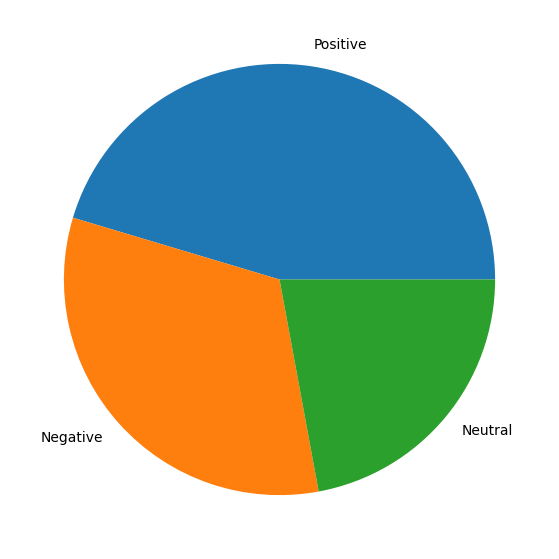

In [44]:
from matplotlib import pyplot as plt 
plt.figure(figsize =(10, 7)) 
plt.pie([positive,negative,neutral], labels = ['Positive','Negative','Neutral']) 

### Vectorization

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]


### Visualizing top 20 unigrams

<Axes: title={'center': 'Top 20 unigrams in review after removing stop words'}, xlabel='snippet'>

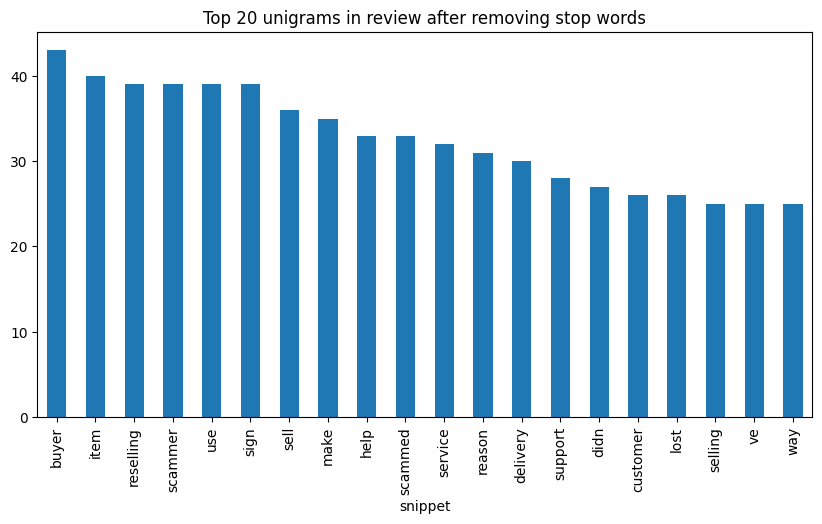

In [46]:
common_words = top_n_ngram(data['snippet'], 20,1)
df = pd.DataFrame(common_words, columns = ['snippet' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('snippet').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')

### top 20 bigrams

<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='snippet'>

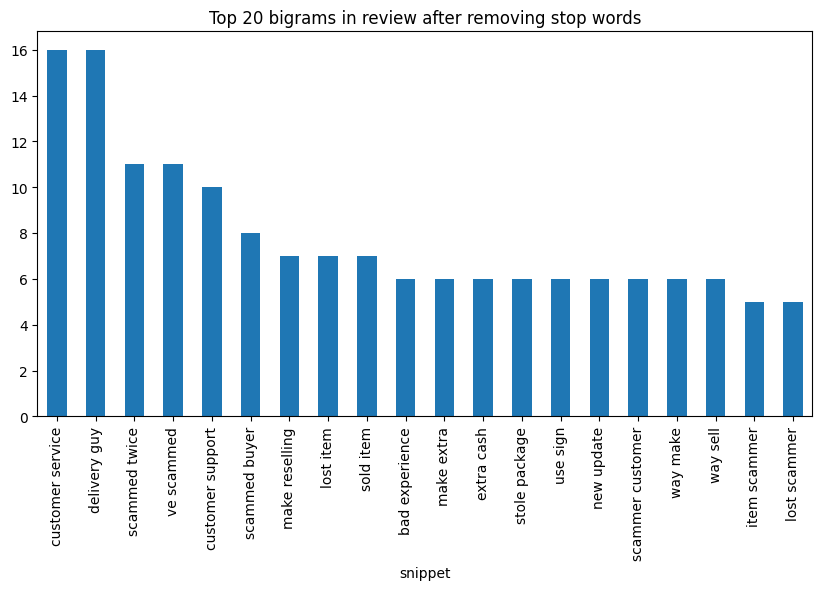

In [47]:
common_words = top_n_ngram(data['snippet'], 20,2)
df = pd.DataFrame(common_words, columns = ['snippet' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('snippet').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bigrams in review after removing stop words')

### Visualizing Top 20 trigrams

<Axes: title={'center': 'Top 20 trigrams in review after removing stop words'}, xlabel='snippet'>

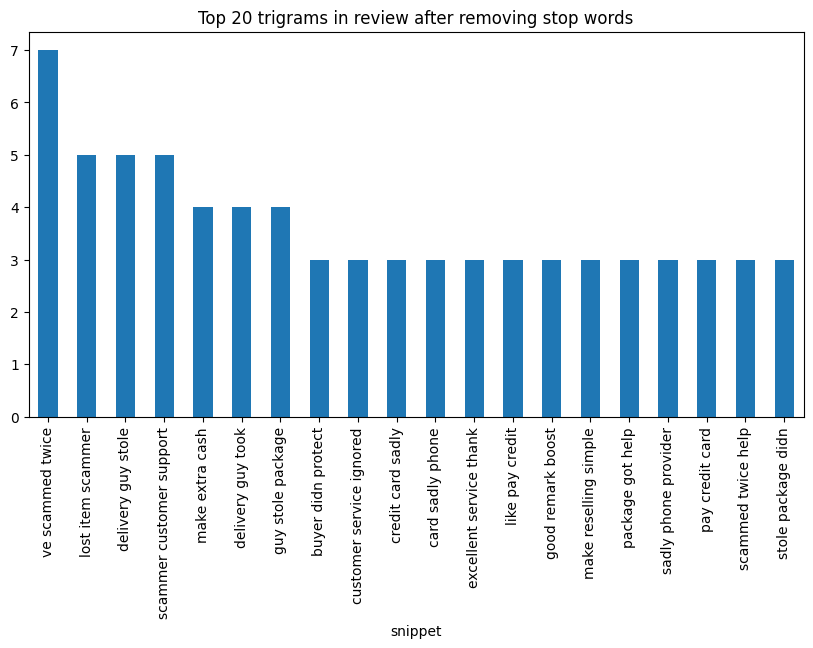

In [48]:
common_words = top_n_ngram(data['snippet'], 20,3)
df = pd.DataFrame(common_words, columns = ['snippet' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('snippet').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 trigrams in review after removing stop words')

In [49]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
# blob= TextBlob(str(data['snippet']))
# pos = pd.DataFrame(blob.tags,columns =['word','pos'])
# pos1 = pos.pos.value_counts()[:20]
# plt.figure(figsize = (10,5))
# pos1.plot(kind='bar',title ='Top 20 Part-of-speech taggings')

In [51]:
y = data['polarity']
X = data.drop(columns='snippet')

In [52]:
print(y)
print(X)

0      0.000000
1      0.333333
2      0.000000
3     -0.300000
4     -0.316667
         ...   
565    0.000000
566   -0.270000
567   -0.350000
568   -0.175000
569    0.600000
Name: polarity, Length: 570, dtype: float64
     polarity  review_len  token_count
0    0.000000          31            5
1    0.333333          30            4
2    0.000000          27            4
3   -0.300000          26            5
4   -0.316667          40            6
..        ...         ...          ...
565  0.000000          80           13
566 -0.270000         102           18
567 -0.350000         111           14
568 -0.175000          28            4
569  0.600000          20            4

[570 rows x 3 columns]


### Correlation HeatMap

<Axes: >

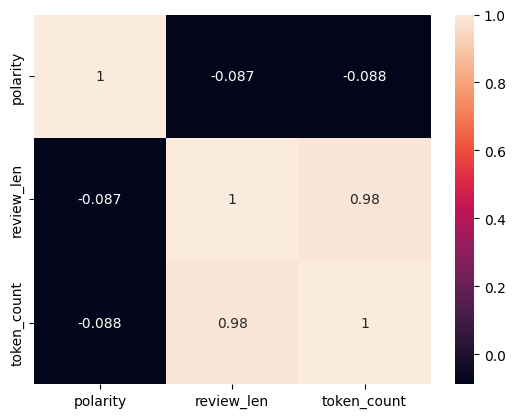

In [53]:
import seaborn as sns
sns.heatmap(X.corr(),annot =True)

In [54]:
set1 =set()
cor = X.corr()
for i in cor.columns:
    for j in cor.columns:
        if cor[i][j]>0.8 and i!=j:
            set1.add(i)
print(set1)

{'token_count', 'review_len'}


In [29]:
X = X.drop(labels = ['token_count'],axis = 1) #because it's highly correlated with review len


<Axes: >

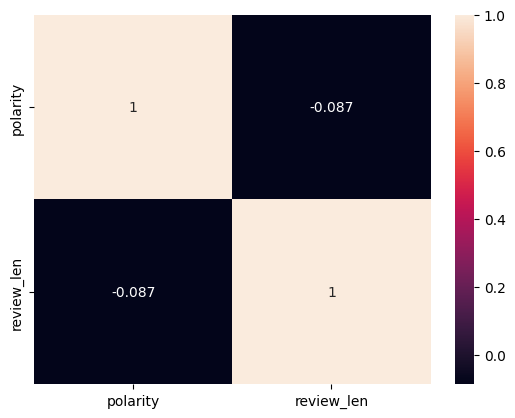

In [30]:
sns.heatmap(X.corr(),annot =True)

### Labeling

In [55]:
class1 =[]
for i in X.polarity:
    if float(i)>=0.0:
        class1.append(1)
    elif float(i)<0.0:
        class1.append(0)
X['sentiment'] = class1

In [56]:
print(X.head)

<bound method NDFrame.head of      polarity  review_len  token_count  sentiment
0    0.000000          31            5          1
1    0.333333          30            4          1
2    0.000000          27            4          1
3   -0.300000          26            5          0
4   -0.316667          40            6          0
..        ...         ...          ...        ...
565  0.000000          80           13          1
566 -0.270000         102           18          0
567 -0.350000         111           14          0
568 -0.175000          28            4          0
569  0.600000          20            4          1

[570 rows x 4 columns]>
